1. Explore Label Data

In [13]:
#imports

import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
import cv2

In [14]:

# counting summary aspects of data

video_data = os.listdir('..\\data_scraping\\Web_Scrape_Labeled_2\\')
video_data = video_data + os.listdir('..\\data_supplement\\Self_Record_Labeled\\')
# print(video_data)

o_counter = 0
f_counter = 0
b_counter = 0
s_counter = 0
l_counter = 0

left_counter = 0
NUM_FILES = 76

for filename in video_data:
    o_counter += int(filename[4])
    f_counter += int(filename[7])
    b_counter += int(filename[10])
    s_counter += int(filename[13])
    l_counter += int(filename[16])
    if (filename[18] == 'L'): 
        left_counter += 1
    
    # making sure labels are OK after averages
    if (int(filename[7]) > 0 and int(filename[10]) > 0):
        print('Review ' + str(filename))

left_counter = float(left_counter) / (float(NUM_FILES))
left_counter *= 100


L entrances: 219.737%
R entrances: -119.737%

Sums of all ratings: 
overstride: 795
forward lean: 393
backward lean: 620
sweeping: 1238
low arms: 644


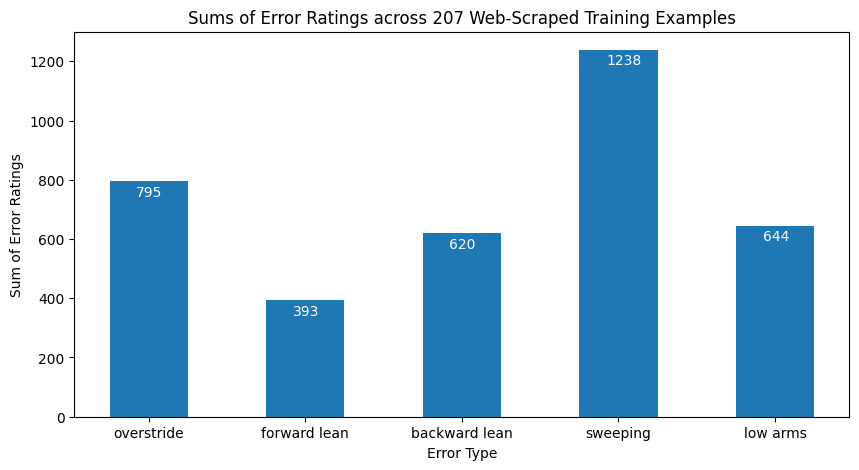

In [15]:
# displaying summative data information

print('L entrances: ' + str(round(left_counter, 3)) + '%')
print('R entrances: ' + str(round(100 - left_counter, 3)) + '%\n')

print('Sums of all ratings: ')
print('overstride: ' + str(o_counter))
print('forward lean: ' + str(f_counter))
print('backward lean: ' + str(b_counter))
print('sweeping: ' + str(s_counter))
print('low arms: ' + str(l_counter))

errors = ['overstride', 'forward lean', 'backward lean', 'sweeping', 'low arms']
rating_sums = [o_counter, f_counter, b_counter, s_counter, l_counter]

fig = plt.figure(figsize=(10, 5))

plt.bar(errors, rating_sums, width = 0.5)
plt.xlabel('Error Type')
plt.ylabel('Sum of Error Ratings')
plt.title('Sums of Error Ratings across 207 Web-Scraped Training Examples')    

for index, value in enumerate(rating_sums):
    plt.text(index - 0.08, value -50, str(value), color='white') # add annotations

plt.show()

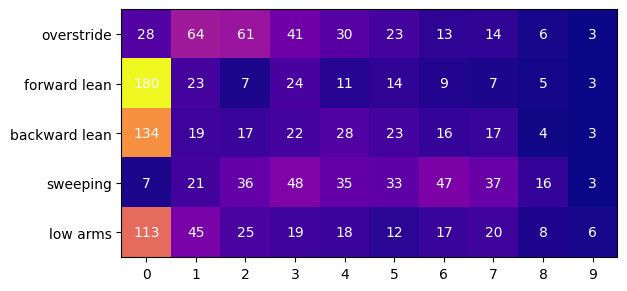

In [16]:
ratings = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

type_count = np.zeros((5, 10), dtype=int)

for filename in video_data:
    type_count[0][int(filename[4])] += 1
    type_count[1][int(filename[7])] += 1
    type_count[2][int(filename[10])] += 1
    type_count[3][int(filename[13])] += 1
    type_count[4][int(filename[16])] += 1

# print(type_count)



fig, ax = plt.subplots()
im = ax.imshow(type_count, cmap='plasma')

ax.set_xticks(np.arange(len(ratings)))
ax.set_yticks(np.arange(len(errors)))
ax.set_xticklabels(ratings)
ax.set_yticklabels(errors)

for i in range(len(errors)):
    for j in range(len(ratings)):
        text = ax.text(j, i, type_count[i, j], ha="center", va="center", color="white")

plt.show()

2. Use MoveNet to Save Time Series

height: 1080.0
width: 1920.0
[[[[0.5350211  0.24674356 0.33394694]
   [0.52815187 0.2500533  0.34137627]
   [0.52685714 0.24415731 0.5266801 ]
   [0.5287678  0.24006276 0.30467632]
   [0.5245284  0.2292488  0.47670224]
   [0.5405782  0.21787219 0.4585953 ]
   [0.5383233  0.21473761 0.4940938 ]
   [0.562106   0.23447298 0.18989493]
   [0.5666702  0.21642698 0.31034034]
   [0.55896384 0.2738975  0.2200292 ]
   [0.55247396 0.2683203  0.19785061]
   [0.6087708  0.19243847 0.4253038 ]
   [0.6150143  0.1833649  0.36881855]
   [0.6487038  0.21202764 0.41314945]
   [0.65433115 0.20718926 0.30183667]
   [0.6934904  0.18934348 0.21931012]
   [0.70803845 0.15994246 0.33869877]]]]
[[[[0.52588654 0.26677436 0.38625574]
   [0.51928663 0.26851836 0.39731753]
   [0.51968837 0.26536953 0.3960806 ]
   [0.51949644 0.2611807  0.29372585]
   [0.5173898  0.25864875 0.3650847 ]
   [0.5273699  0.23703153 0.5143779 ]
   [0.52542675 0.24212931 0.44445148]
   [0.5600388  0.25045428 0.2446826 ]
   [0.56410855 0.2

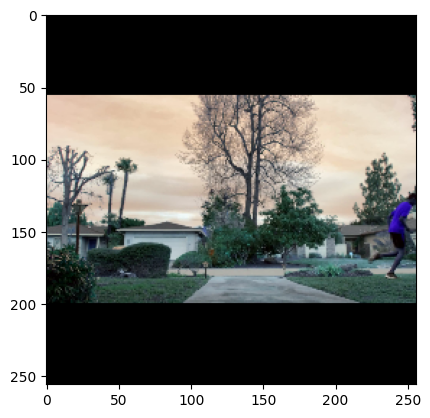

In [17]:
# pose estimation

interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_thunder_tflite_float16_4.tflite')
interpreter.allocate_tensors()

cap = cv2.VideoCapture('..\\data_supplement\\Self_Record_Labeled\\SR-O0-F6-B0-S3-L7-L-0000.mp4')
print('height: ' + str(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('width: ' + str(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
# print(type(cap))
# print(cap.isOpened())

ret, frame = cap.read()
# print(ret)
#print(frame)


while (cap.isOpened()):
    ret, frame = cap.read()
    # print(ret)

    if ret:
        # cv2.imshow('frame', frame)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
    
        # reshape image
        img = frame.copy()
        img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 256,256)
        input_image = tf.cast(img, dtype=tf.uint8)

        plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32)) # display only

        
        # set up input / output
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # make prediction'''
        interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
        interpreter.invoke()
        points_with_scores = interpreter.get_tensor(output_details[0]['index'])
        print(points_with_scores)
    
    else:
        break

cap.release()

    